In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


d:\Python\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


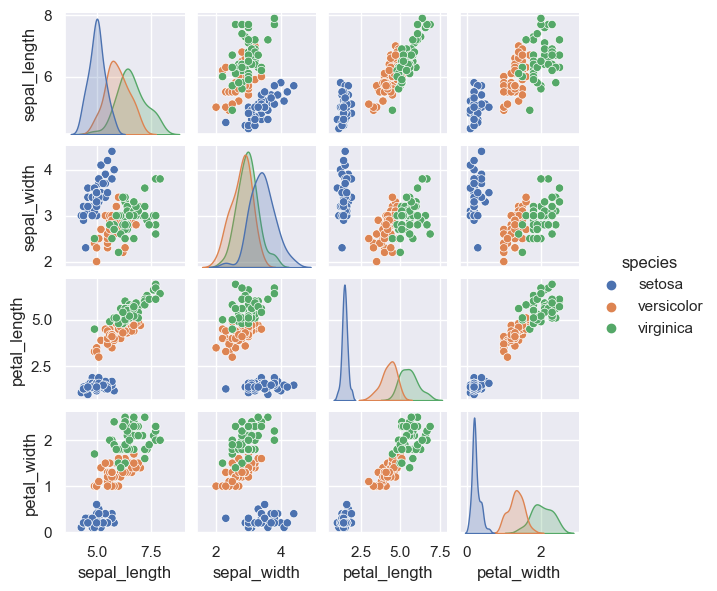

In [149]:
iris = sns.load_dataset('iris')
iris.head()
#%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [150]:
# отделяем таргет
X_iris = iris.drop(columns='species')
y_iris = iris['species']


Пример: обучение без учителя

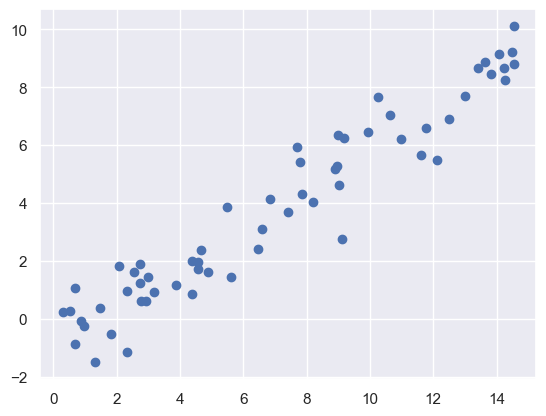

In [151]:
rng = np.random.RandomState(42)
x = 15 * rng.rand(60)
y = 0.7 * x - 1 + rng.randn(60)
plt.scatter(x, y)

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
print(model.coef_, model.intercept_)

[0.6752053] -0.9113480048537732


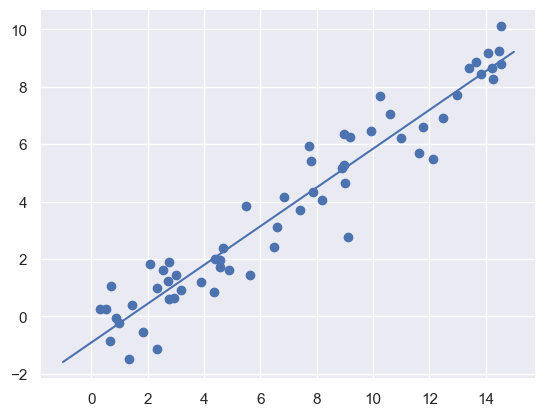

In [153]:
xfit = np.linspace(-1, 15)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)


Пример: обучение с учителем

In [154]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=42, test_size=0.2) # разделяем выборку
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # задаем модель
model.fit(Xtrain, ytrain) # обучаем на данных, сначала параметры, потом таргет
y_model = model.predict(Xtest) # даем модели предсказать на тестовых данных зависимых переменных
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # проверяем работу модели на тестовом таргете

1.0

Пример: обучение без учителя Iris
понижение размерности данных

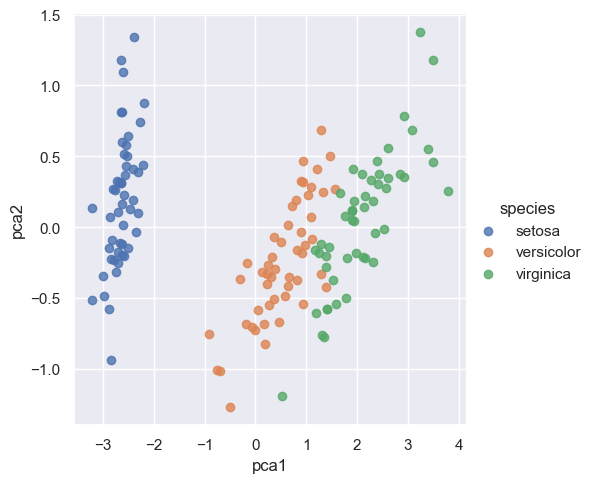

In [155]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) # экземпляр модели с гиперпараметрами
model.fit(X_iris) # обучение на данных, у не указываем!
X_2d = model.transform(X_iris) # преобразование данных в двумерные
iris['pca1'] = X_2d[:, 0]
iris['pca2'] = X_2d[:, 1]
sns.lmplot(x="pca1", y="pca2", hue='species', data=iris, fit_reg=False)


Пример: обучение без учителя Iris
кластеризация

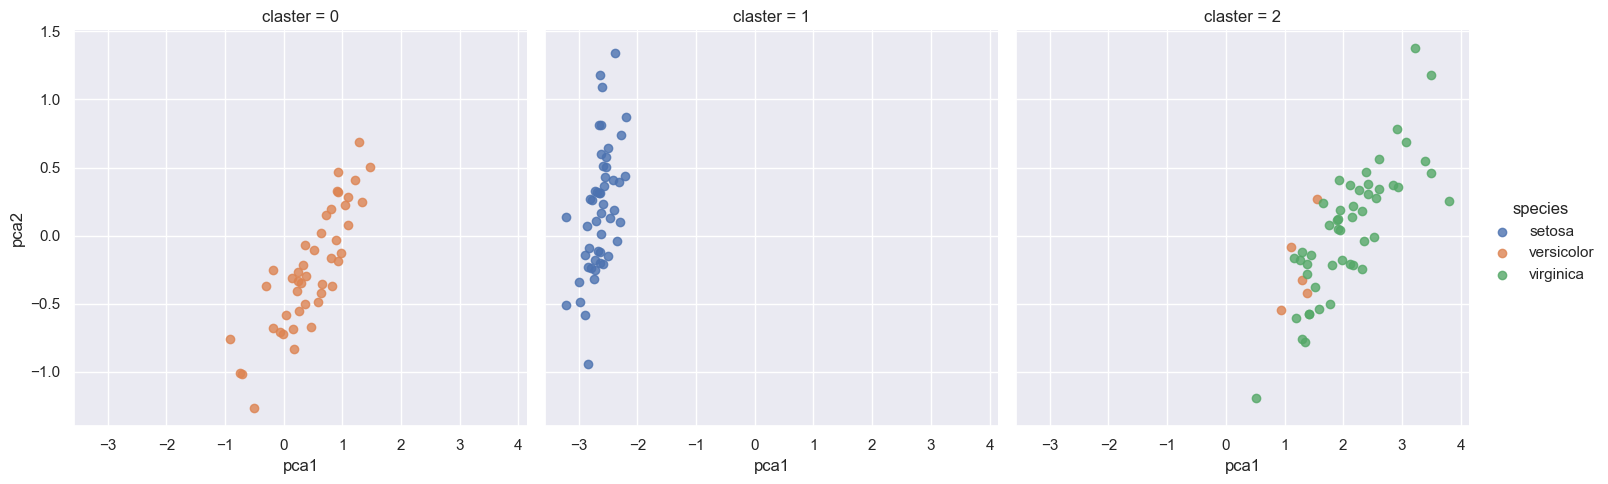

In [156]:
from sklearn.mixture import GaussianMixture as GM # выбираем класс модели
model = GM(n_components=3, covariance_type='full') # создаем экземпляр модели
model.fit(X_iris ) # обучение на данных, у не указываем!
y_gm = model.predict(X_iris) # определяем метки кластеров
iris["claster"] = y_gm
sns.lmplot(x="pca1", y="pca2", hue='species', data=iris, fit_reg=False, col='claster')

Прикладная задача: анализ рукописных цифр

'Этот код создает сетку из 10 на 10 графиков (10 рядов и 10 столбцов) с помощью функции subplots \nиз библиотеки matplotlib. Каждый график представляет собой изображение цифры, которое берется из набора данных "digits". \nЦикл for перебирает все элементы в сетке графиков и для каждого графика устанавливается изображение с помощью функции\n imshow, которая принимает изображение из набора данных "digits" и устанавливает черно-белый цвет cmap=\'binary\'. \nФункция text добавляет текст рядом с каждым графиком, который указывает, какую цифру представляет это изображение \n(это значениехранится в массиве target). Каждый график имеет пустые метки xticks и yticks, чобы убрать деления на осях x и y.\nПараметры hspace и wspace задают пространство между графиками по вертикали и горизонтали соответственно. \nИзображения отображаются с использованием ближайшего соседа для интерполяции, что означает, что каждый пиксель\n на изображении соответствует одному пикселю на экране'

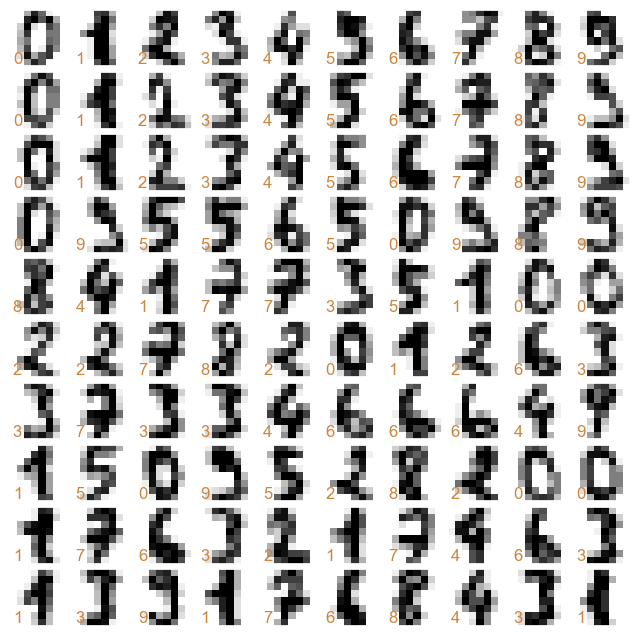

In [157]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # (1797, 8, 8) 1797 выборок каждая 8 х 8

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='peru')
"""Этот код создает сетку из 10 на 10 графиков (10 рядов и 10 столбцов) с помощью функции subplots 
из библиотеки matplotlib. Каждый график представляет собой изображение цифры, которое берется из набора данных "digits". 
Цикл for перебирает все элементы в сетке графиков и для каждого графика устанавливается изображение с помощью функции
 imshow, которая принимает изображение из набора данных "digits" и устанавливает черно-белый цвет cmap='binary'. 
Функция text добавляет текст рядом с каждым графиком, который указывает, какую цифру представляет это изображение 
(это значениехранится в массиве target). Каждый график имеет пустые метки xticks и yticks, чобы убрать деления на осях x и y.
Параметры hspace и wspace задают пространство между графиками по вертикали и горизонтали соответственно. 
Изображения отображаются с использованием ближайшего соседа для интерполяции, что означает, что каждый пиксель
 на изображении соответствует одному пикселю на экране"""


d:\Python\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Python\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\Users\Professional\AppData\Local\Temp\ipykernel_1992\2696253201.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x=data_projected[:, 0], y=data_projected[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Blues', 10))


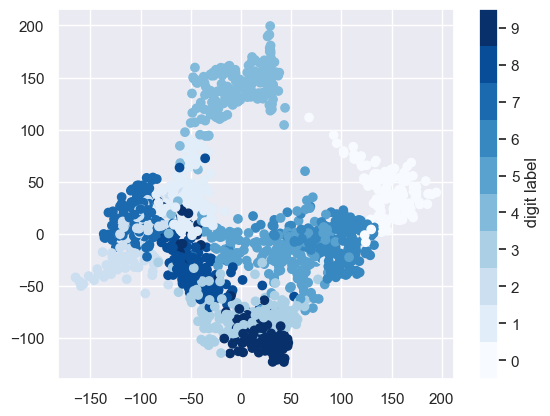

In [158]:
X = digits.data
y = digits.target
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape
plt.scatter(x=data_projected[:, 0], y=data_projected[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Blues', 10))
plt.colorbar(label=' digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [159]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2) # разделяем выборку
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)
# простая модель неплохо справилась с задачей классификации цифр 

0.8472222222222222

Text(110.44999999999997, 0.5, 'true value')

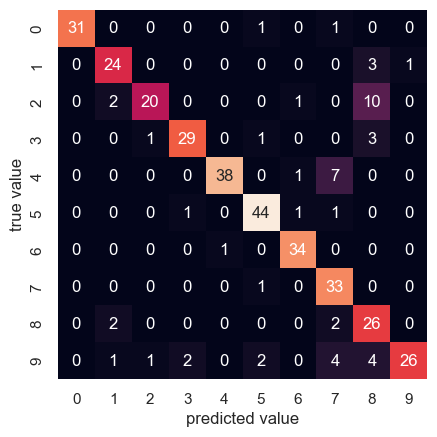

In [160]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel('true value')
# значительное количество 2 идентифицуруется как 8

Проверка модели

Плохой способ

In [161]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # метка для неизвестной точки такая же как и для ближайшей к ней обучающей точки
model.fit(X, y)
y_model =  model.predict(X)
accuracy_score(y, y_model) # обучение и оценка на одних и тех же данных

1.0

Хороший способ

In [162]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=42, train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9733333333333334

Cross-validation

In [163]:
# двухблочная (50% и 50%) кроссвалидация, two-fold-cross-validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print(accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))
y3 = (y1 + y2) / 2
y3_model = (y1_model + y2_model) / 2 
from sklearn.metrics import r2_score
r2_score(y3, y3_model), r2_score(y1, y1_model), r2_score(y2, y2_model)

0.9333333333333333 0.9733333333333334


(0.9204545454545454, 0.8947811447811448, 0.9611801242236024)

In [164]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [165]:
from sklearn.model_selection import LeaveOneOut
sc = cross_val_score(model, X, y, cv=LeaveOneOut())
sc, sc.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.96)

Выбор оптимальной модели

Проверка модели

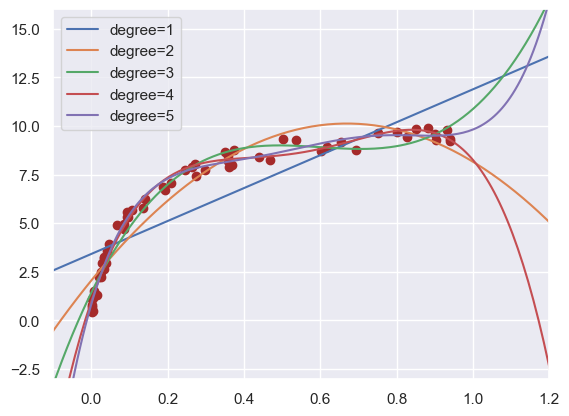

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolinomialRegression(degree=2, **kwards):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwards))

def make_data(N, err=1.0, rseed=42):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.rand(N)
    return X, y

X, y = make_data(60)

sns.set()
X_test = np.linspace(-.2, 1.5, 250)[:, None]

plt.scatter(X.ravel(), y, color='brown')
for degree in [1, 2, 3, 4 , 5]:
    y_test = PolinomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-.1, 1.2)
plt.ylim(-3, 16)
plt.legend(loc='best')

Кривые обучения

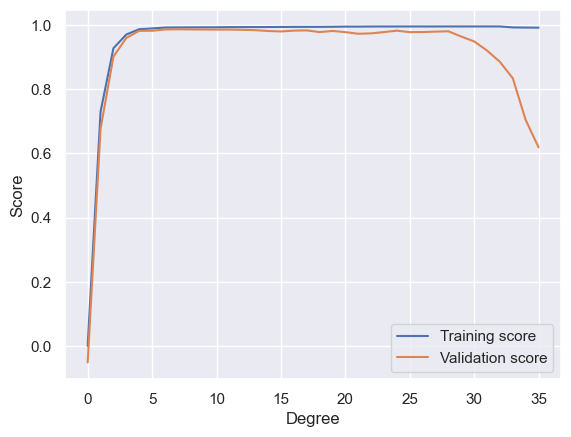

In [188]:
# анализ эффективности гиперпараметра степень для нашей полиномиальной модели
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve 

degree=np.arange(0, 36)

train_score, val_score = validation_curve(PolinomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

train_scores_mean = np.mean(train_score, axis=1)
val_scores_mean = np.mean(val_score, axis=1)

plt.plot(degree, train_scores_mean, label='Training score')
plt.plot(degree, val_scores_mean, label='Validation score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

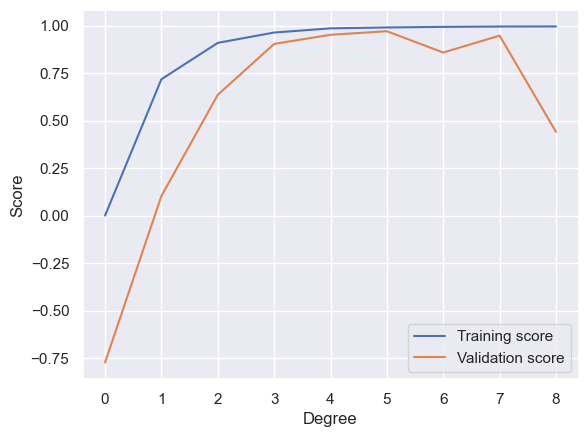

In [192]:
X, y = make_data(20)
# график (то есть работа модели сильно зависит от обучающей выборки)
degree=np.arange(0, 9)

train_score, val_score = validation_curve(PolinomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

train_scores_mean = np.mean(train_score, axis=1)
val_scores_mean = np.mean(val_score, axis=1)

plt.plot(degree, train_scores_mean, label='Training score')
plt.plot(degree, val_scores_mean, label='Validation score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()